In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set()

In [2]:
file_path = os.getcwd() + "\\var_check"

### For levy function check

In [3]:
file_path = file_path + "\\levy_var_check_200"

In [4]:
grids = []
acq_grids = []

for i in range(5,34):
    grids.append(np.load(file_path + "\\grid_iter_%d.npy"%i))
    acq_grids.append(np.load(file_path + "\\saved_acq_iter_%d.npy"%i))

In [5]:
x_min = -5
x_max = 5

In [6]:
grids[0][0] *2

array([0.91345215, 1.94250488, 0.42834473, 1.34484863])

In [7]:
mapped_grids = []

for grid in grids:
    mapped_grid = []
    for point in grid:
        mapped_point = point * (x_max - x_min) + x_min
        mapped_grid.append(mapped_point)
        
    mapped_grids.append(mapped_grid)

In [8]:
len(mapped_grids)

29

In [9]:
len(acq_grids[0])

200

In [12]:
len(acq_grids[0])

200

In [23]:
plt.figure(figsize=(10,6))
avgs = []
for mk_so_far in range(len(acq_grids[0])):
    acq_grids_so_far = acq_grids[0][:mk_so_far+1]
    avg_ = np.average(acq_grids_so_far, axis=0)
    avgs.append(avg_)

<Figure size 720x432 with 0 Axes>

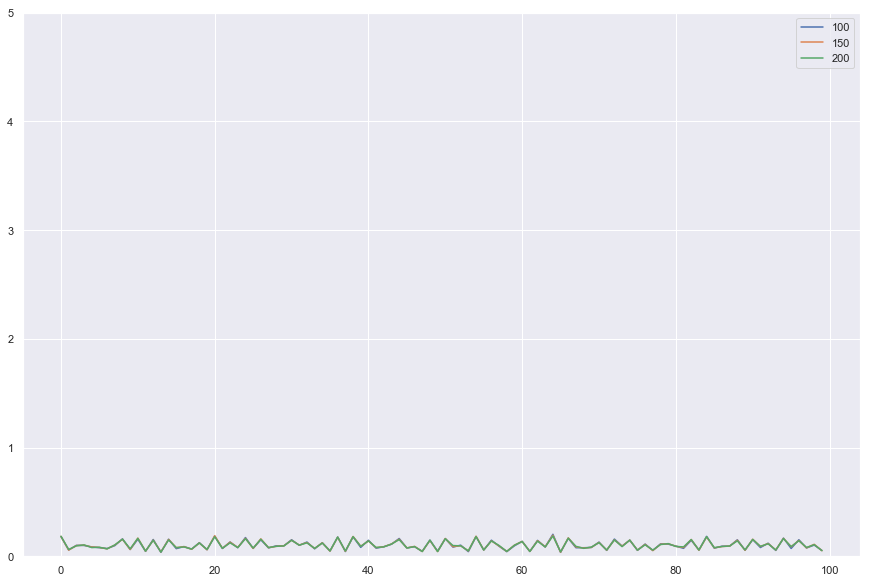

In [37]:
start = 0
last = 100
plt.figure(figsize=(15,10))
#plt.plot(avgs[0][:100], label='1')
#plt.plot(avgs[10-1][:100], label='50')
plt.plot(avgs[100-1][start:last], label='100')
plt.plot(avgs[150-1][start:last], label='150')
plt.plot(avgs[200-1][start:last], label='200')
plt.ylim(ymin=0, ymax=5)
plt.legend()

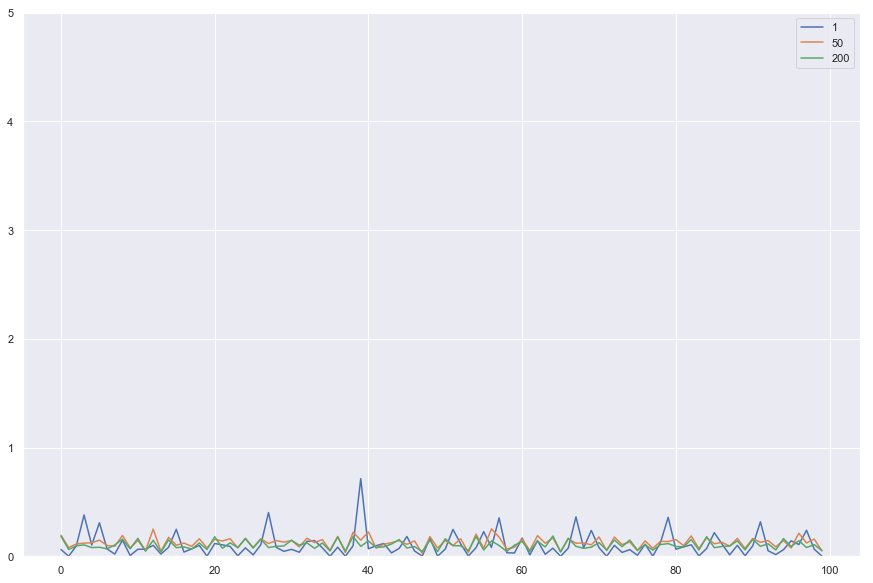

In [38]:
start = 0
last = 100

plt.figure(figsize=(15,10))
plt.plot(avgs[0][start:last], label='1')
plt.plot(avgs[10-1][start:last], label='50')
#plt.plot(avgs[100-1][start:last], label='100')
#plt.plot(avgs[150-1][start:last], label='150')
plt.plot(avgs[200-1][start:last], label='200')
plt.ylim(ymin=0, ymax=5)
plt.legend()

### For first round 

In [ ]:
info = dict()
for i in range(1,201):
    cur_target_grids = list(acq_grids[0][:i])
    avg_cur_target_grids = np.average(cur_target_grids, axis=0)
    var_cur_target_grids = np.var(cur_target_grids,axis=0)
    cur_largest_sol_idx = np.argmax(avg_cur_target_grids)
    avg_cur_largest_acq_val = avg_cur_target_grids[cur_largest_sol_idx]
    var_cur_largest_acq_val = var_cur_target_grids[cur_largest_sol_idx]
    
    # finding second largest index
    cur_sec_sol_index = 0
    for index in range(len(avg_cur_target_grids)):
        if(avg_cur_target_grids[index] != avg_cur_largest_acq_val):
            cur_sec_sol_index = index if avg_cur_target_grids[index] > avg_cur_target_grids[cur_sec_sol_index] else cur_sec_sol_index
        
    avg_cur_largest_acq_val_sec = avg_cur_target_grids[cur_sec_sol_index]
    var_cur_largest_acq_val_sec = var_cur_target_grids[cur_sec_sol_index]
    print("average: %f, variance: %f, at x %s"%(avg_cur_largest_acq_val, var_cur_largest_acq_val, cur_largest_sol_idx))
    info[i] = {'avg' : avg_cur_largest_acq_val, 'val' : var_cur_largest_acq_val, 'idx': cur_largest_sol_idx}

In [ ]:
iter_dict_list = []
iter_dict_sec_list = []
for iter_num in range(0,29):
    info = dict()
    info_sec = dict()
    for i in range(1,201):
        cur_target_grids = list(acq_grids[iter_num][:i])
        avg_cur_target_grids = np.average(cur_target_grids, axis=0)
        var_cur_target_grids = np.var(cur_target_grids,axis=0)
        cur_largest_sol_idx = np.argmax(avg_cur_target_grids)
        avg_cur_largest_acq_val = avg_cur_target_grids[cur_largest_sol_idx]
        var_cur_largest_acq_val = var_cur_target_grids[cur_largest_sol_idx]
        # finding second largest index
        cur_sec_sol_index = 0
        for index in range(len(avg_cur_target_grids)):
            if(index != cur_largest_sol_idx):
                cur_sec_sol_index = index if avg_cur_target_grids[index] > avg_cur_target_grids[cur_sec_sol_index] else cur_sec_sol_index
        
        avg_cur_largest_acq_val_sec = avg_cur_target_grids[cur_sec_sol_index]
        var_cur_largest_acq_val_sec = var_cur_target_grids[cur_sec_sol_index]
        
        
        info[i] = {'avg' : avg_cur_largest_acq_val, 'var' : var_cur_largest_acq_val, 'idx': cur_largest_sol_idx}
        info_sec[i] = {'avg' : avg_cur_largest_acq_val_sec, 'var' : var_cur_largest_acq_val_sec, 'idx': cur_sec_sol_index}
        
    iter_dict_list.append(info)
    iter_dict_sec_list.append(info_sec)
        

In [ ]:
avg_val_list = []
var_val_list = []
idx_acq_list = []

avg_val_list_2 = []
var_val_list_2 = []
idx_acq_list_2 = []

for i in range(1,len(iter_dict_list[0])+1):
    avg_val_list.append(iter_dict_list[0][i]['avg'])
    var_val_list.append(iter_dict_list[0][i]['var'])
    idx_acq_list.append(iter_dict_list[0][i]['idx'])
    
    avg_val_list_2.append(iter_dict_sec_list[0][i]['avg'])
    var_val_list_2.append(iter_dict_sec_list[0][i]['var'])
    idx_acq_list_2.append(iter_dict_sec_list[0][i]['idx'])



In [ ]:
iter_avg_val = []
iter_var_val = []
iter_idx_acq = []

iter_avg_val_2 = []
iter_var_val_2 = []
iter_idx_acq_2 = []

for iter_num in range(len(iter_dict_list)):
    avg_val_list = []
    var_val_list = []
    idx_acq_list = []
    
    avg_val_list_2 = []
    var_val_list_2 = []
    idx_acq_list_2 = []
    
    for i in range(1,len(iter_dict_list[iter_num])+1):
        avg_val_list.append(iter_dict_list[iter_num][i]['avg'])
        var_val_list.append(iter_dict_list[iter_num][i]['var'])
        idx_acq_list.append(iter_dict_list[iter_num][i]['idx'])
        
        avg_val_list_2.append(iter_dict_sec_list[iter_num][i]['avg'])
        var_val_list_2.append(iter_dict_sec_list[iter_num][i]['var'])
        idx_acq_list_2.append(iter_dict_sec_list[iter_num][i]['idx'])
            
    iter_avg_val.append(avg_val_list)
    iter_var_val.append(var_val_list)
    iter_idx_acq.append(idx_acq_list)
    
    iter_avg_val_2.append(avg_val_list_2)
    iter_var_val_2.append(var_val_list_2)
    iter_idx_acq_2.append(idx_acq_list_2)

                      

### Exporting it to Excel

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data=list(zip(iter_avg_val[0], iter_var_val[0], iter_idx_acq[0],
                               [mapped_grids[0][idx][0] for idx in iter_idx_acq[0]],
                               [mapped_grids[0][idx][1] for idx in iter_idx_acq[0]],
                               [mapped_grids[0][idx][2] for idx in iter_idx_acq[0]],
                               [mapped_grids[0][idx][3] for idx in iter_idx_acq[0]],
                               ["" for idx in iter_idx_acq[0]],
                               iter_avg_val_2[0], iter_var_val_2[0],iter_idx_acq_2[0],
                               [mapped_grids[0][idx][0] for idx in iter_idx_acq_2[0]],
                               [mapped_grids[0][idx][1] for idx in iter_idx_acq_2[0]],
                               [mapped_grids[0][idx][2] for idx in iter_idx_acq_2[0]],
                               [mapped_grids[0][idx][3] for idx in iter_idx_acq_2[0]])),columns=['Avg', 'Var', 'Idx','x1','x2','x3','x4','','Avg', 'Var', 'Idx','x1','x2','x3','x4'])


In [ ]:
for iter_num in range(0,len(iter_avg_val)):
    df = pd.DataFrame(data=list(zip(iter_avg_val[iter_num], iter_var_val[iter_num], iter_idx_acq[iter_num],
                               [mapped_grids[iter_num][idx][0] for idx in iter_idx_acq[iter_num]],
                               [mapped_grids[iter_num][idx][1] for idx in iter_idx_acq[iter_num]],
                               [mapped_grids[iter_num][idx][2] for idx in iter_idx_acq[iter_num]],
                               [mapped_grids[iter_num][idx][3] for idx in iter_idx_acq[iter_num]],
                               ["" for idx in iter_idx_acq[iter_num]],
                               iter_avg_val_2[iter_num], iter_var_val_2[iter_num],iter_idx_acq_2[iter_num],
                               [mapped_grids[iter_num][idx][0] for idx in iter_idx_acq_2[iter_num]],
                               [mapped_grids[iter_num][idx][1] for idx in iter_idx_acq_2[iter_num]],
                               [mapped_grids[iter_num][idx][2] for idx in iter_idx_acq_2[iter_num]],
                               [mapped_grids[iter_num][idx][3] for idx in iter_idx_acq_2[iter_num]])),columns=['Avg', 'Var', 'Idx','x1','x2','x3','x4','','Avg', 'Var', 'Idx','x1','x2','x3','x4'])
    
    df.to_excel("%s\\info_%d.xlsx"%(file_path,iter_num+5))


In [ ]:
iter_num

In [ ]:
iter_avg_val[iter_num]

In [ ]:
len(iter_avg_val)

In [ ]:
n=0
while n<5:
    n = n+1
    grids = [n]


In [ ]:
grids